# AWS DeepRacer Lab
Available at https://console.aws.amazon.com/deepracer  
This notebook summarizes training and evaluation steps performed on training a deep-racer vehicle on simple and complicated tracks and the corresponding results.

## Agenda
* Introduction
* Train and evaluate a model on basic track
* Evaluate on a simple and a complicated track
* Further training on simple track and evaluation
* Further training on complicated tracks
* Evaluate on simple and complicated tracks

In [12]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from bokeh.plotting import output_notebook, show, figure
from bokeh.layouts import row, column
output_notebook()

import json
from PIL import Image

Loading BokehJS ...

## Introduction

### Vehicle Information

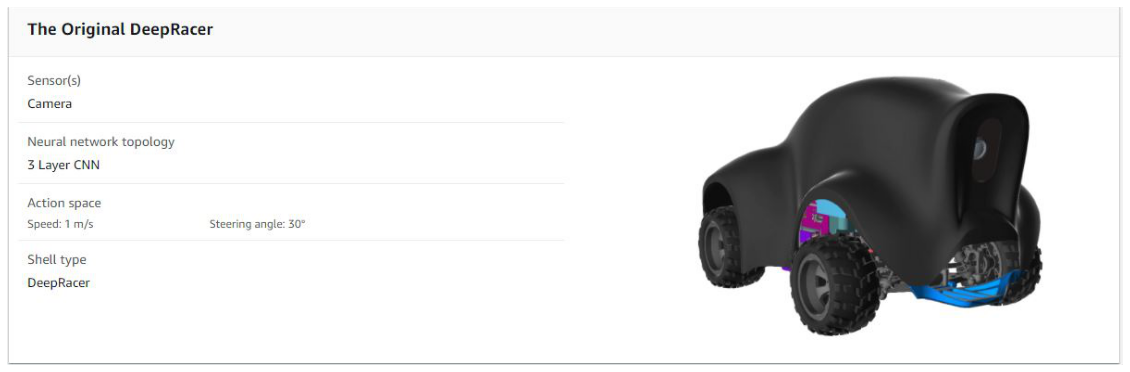

In [5]:
# Vehicle Information
vehicle = mpimg.imread('vehicle.jpg')
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(vehicle);

### Track

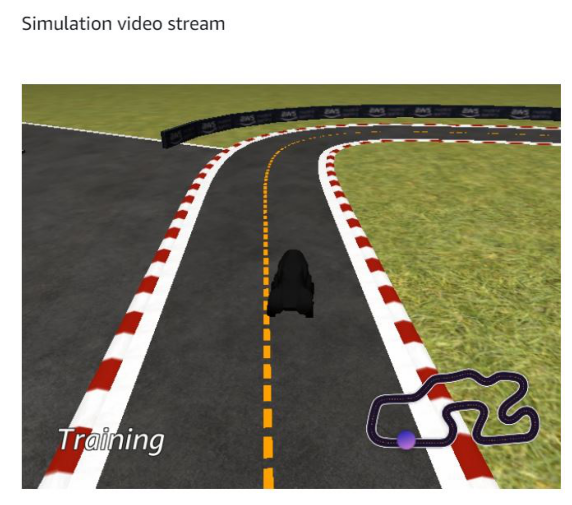

In [67]:
# Track
rewardfunction = mpimg.imread('./Log01/track.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(rewardfunction);

#### Action Space

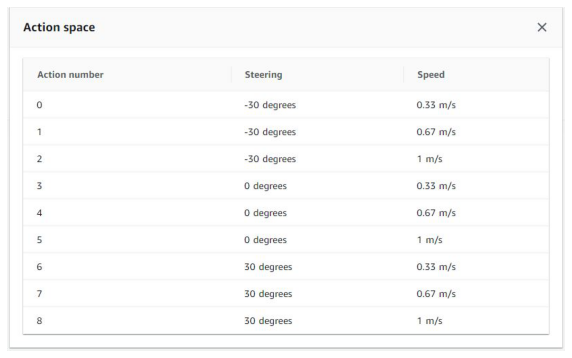

In [7]:
# Action Space
actionspace = mpimg.imread('ActionSpace.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(actionspace);

#### Reward Function

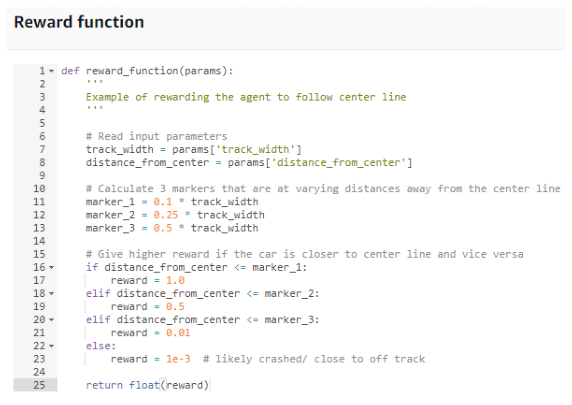

In [8]:
# Reward Function
rewardfunction = mpimg.imread('./Log01/RewardFunction.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(rewardfunction);

## First Model
* Default vehicle
* One camera mounted in the front of the vehicle
* Training on **simple** track
* Evaluation on simple and complicated tracks

#### Simple Track

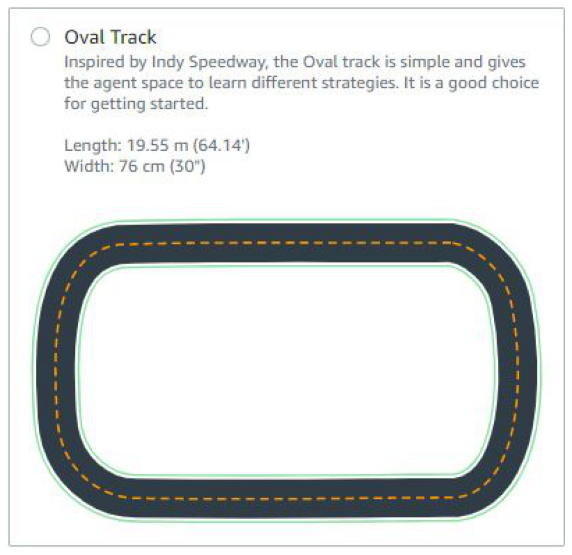

In [10]:
simpletrack = mpimg.imread('simpletrack.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(simpletrack);

## Training performance
Green: Average Reward, Blue: Completion Percentage (Train), Red: Completion percentage (Evaluation)

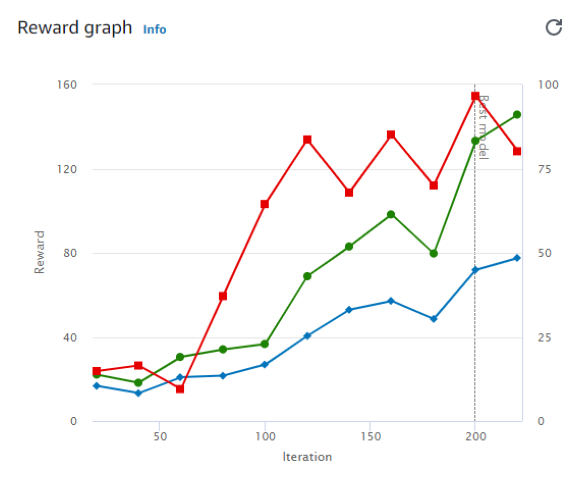

In [11]:
# Training
training01 = mpimg.imread('./Log01/training01.jpg')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(training01);

In [71]:
# Load log data
with open('./Log01/metrics/training/training.json') as jsonfile:
  metrics = json.load(jsonfile)

In [72]:
# Define track completion percentages
train_comp_percent=[metrics['metrics'][x]['completion_percentage'] for x in range(len(metrics['metrics'])) if
             metrics['metrics'][x]['phase']=='training']

eval_comp_percent=[metrics['metrics'][x]['completion_percentage'] for x in range(len(metrics['metrics'])) if
             metrics['metrics'][x]['phase']=='evaluation']

In [73]:
p = figure(plot_width=440, 
           plot_height=350, 
           title='Training - Track Percent Complete', 
           x_axis_label='Iteration',
           y_axis_label='Completion Percentage')

px = np.arange(0,len(train_comp_percent),1)
py = train_comp_percent
p.line(x=px, y=py, line_width=2)

q = figure(plot_width=440, 
           plot_height=350, 
           title='Evaluation - Track Percent Complete', 
           x_axis_label='Iteration',
           y_axis_label='Completion Percentage')

qx = np.arange(0,len(eval_comp_percent),1)
qy = eval_comp_percent
q.line(x=qx, y=qy, line_width=2, color='green')
show(row(p,q))

In [74]:
# Compute Completion Percentage
train = np.array(train_comp_percent)
train_comp = len(train[train>=100])*100/len(train)

test = np.array(eval_comp_percent)
test_comp = len(test[test>=100])*100/len(test)

print('During training, model completed track',np.round(train_comp,1),'% of time.')
print('During testing, model completed track',np.round(test_comp,1),'% of time.')

During training, model completed track 5.2 % of time.
During testing, model completed track 32.3 % of time.


In [32]:
# Plot training simulations
figs = []

# Plot track image
im = Image.open('simpletrackplot.jpg')
im = im.convert("RGBA")
imarray = np.array(im)
p = figure(plot_width=200, plot_height=200, title='Training Track')
p.image_rgba(image=[imarray], x=0, y=0, dw=10, dh=1)
p.toolbar.logo = None
p.toolbar_location = None
p.axis.visible=False
p.grid.visible=False
figs.append(p)

# Plot training tracks
for i in range(11):
    directory_path = './Log01/sim-trace/training/training-simtrace/'
    file_name = str(i)+'-iteration.csv'
    file_path = directory_path + file_name
    track = pd.read_csv(file_path)

    title = 'Iteration - '+str(i)
    episodes = track['episode'].unique()
    
    p = figure(plot_width=200, plot_height=200, title=title)
    for e in episodes:
        trace = track[track['episode']==e]
        x = trace['X']
        y = trace['Y']
        p.line(x=x,y=y, line_width=2)
        p.toolbar.logo = None
        p.toolbar_location = None
        p.axis.visible=False
        p.grid.visible=False
    figs.append(p)

show(column(row(figs[0],figs[1], figs[2], figs[3]),
    row(figs[4],figs[5], figs[6], figs[7]),
    row(figs[8],figs[9], figs[10], figs[11])))

## Testing Performance

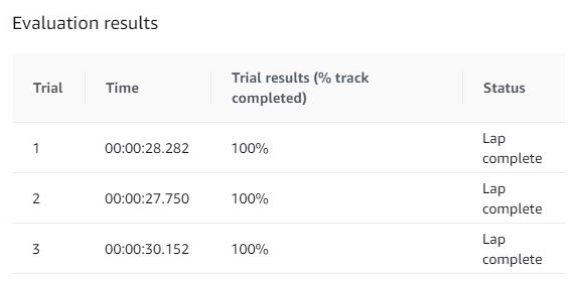

In [20]:
# Simple track results
m1_simple = mpimg.imread('./Log01/m01-results-simple-track.jpg')
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(m1_simple);

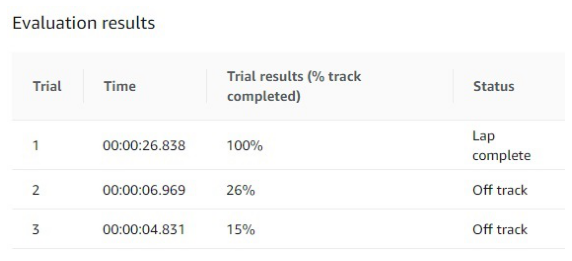

In [33]:
# Complicated track results
m1_complicated = mpimg.imread('./Log01/m01-results-complicated-track.jpg')
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(m1_complicated);

## Additional Training & Evaluation
Additional 3 hours of training with new reward function. Reward of 1 on the yellow line; 0.01 everywhere else. 

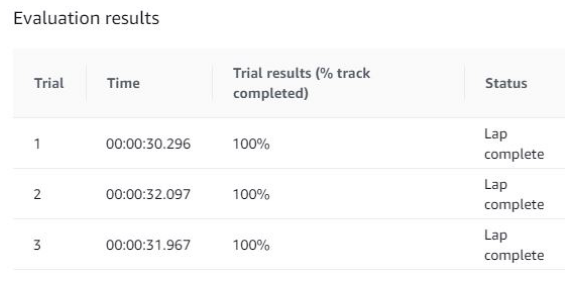

In [34]:
# Simple track results
m12_simple = mpimg.imread('./Log01/m01-2-results-simple-track.jpg')
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(m12_simple);

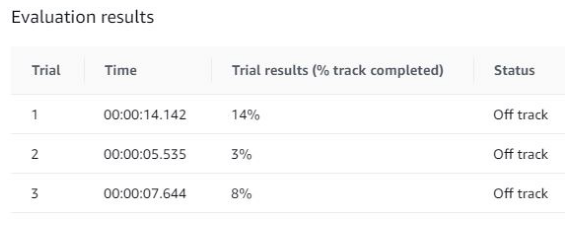

In [35]:
# Complicated track results
m12_complicated = mpimg.imread('./Log01/m01-2-results-complicated-track.jpg')
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(m12_complicated);

### Second Model
* Default vehicle
* One camera mounted in the front of the vehicle
* Training on **complicated** track
* Evaluation on simple and complicated tracks

In [63]:
# Plot training simulations
figs = []

# Plot track image
im = Image.open('complicatedtrackplot.jpg')
im = im.convert("RGBA")
imarray = np.flip(np.array(im), axis=0)
p = figure(plot_width=300, plot_height=200, title='Training Track')
p.image_rgba(image=[imarrayplot], x=0, y=0, dw=10, dh=1)
p.toolbar.logo = None
p.toolbar_location = None
p.axis.visible=False
p.grid.visible=False
p.grid.visible=False
figs.append(p)

# Plot training tracks
for i in range(9):
    directory_path = './Log03/sim-trace/training/training-simtrace/'
    file_name = str(i)+'-iteration.csv'
    file_path = directory_path + file_name
    track = pd.read_csv(file_path)

    title = 'Iteration - '+str(i)
    episodes = track['episode'].unique()
    
    p = figure(plot_width=300, plot_height=200, title=title)
    for e in episodes:
        trace = track[track['episode']==e]
        x = trace['X']
        y = trace['Y']
        p.line(x=x,y=y, line_width=2)
        p.toolbar.logo = None
        p.toolbar_location = None
        p.axis.visible=False
        p.grid.visible=False
    figs.append(p)

show(column(row(figs[0],figs[1], figs[2]),
            row(figs[3],figs[4], figs[5]),
            row(figs[6],figs[7], figs[8])))

#### Testing Performance

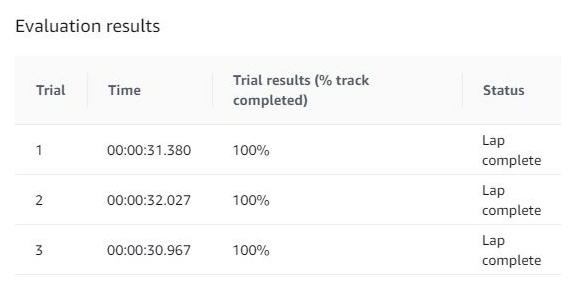

In [64]:
# Simple track results
m21_simple = mpimg.imread('./Log01/m02-1-results-simple-track.jpg')
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(m21_simple);

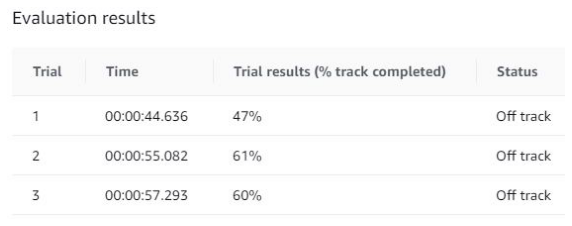

In [66]:
# Complicated track results
m22_simple = mpimg.imread('./Log01/m02-1-results-complicated-track.jpg')
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(m22_simple);

### Concluding Thoughts

* Fine-tuning the action space may allow a specific objective to be maximized sooner
* Much more training is required to perform well on previously unseen tracks
* Reward function may be modified based on the objective